In [6]:
import pandas as pd
# Load the dataset
data = pd.read_csv("honeyproduction1998-2021.csv")
# Display the first few rows of the dataset
data.head()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


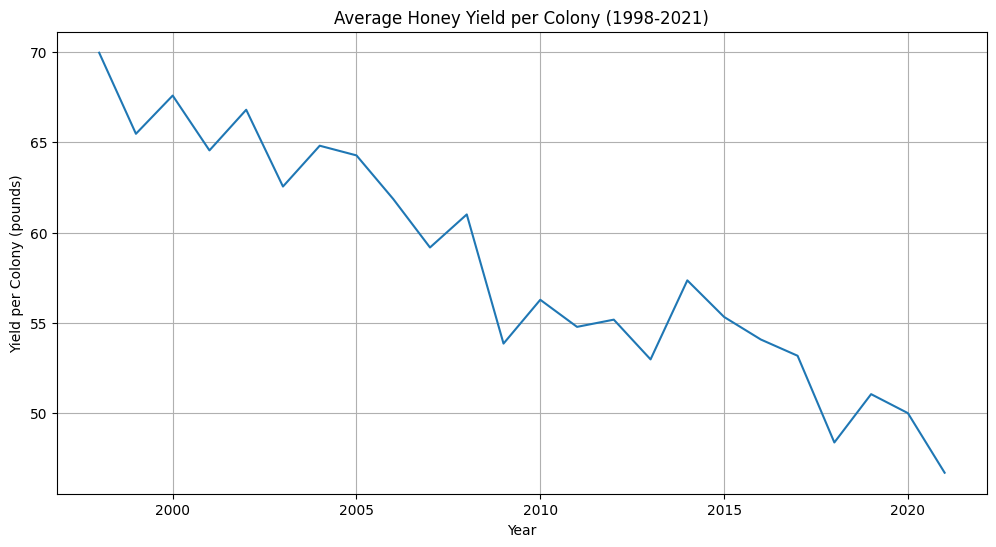

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the average yield per colony for each year
avg_yield_per_year = data.groupby('year')['yieldpercol'].mean().reset_index()
# Plot the average yield per colony over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_yield_per_year, x='year', y='yieldpercol')
plt.title('Average Honey Yield per Colony (1998-2021)')
plt.xlabel('Year')
plt.ylabel('Yield per Colony (pounds)')
plt.grid(True)
plt.show()


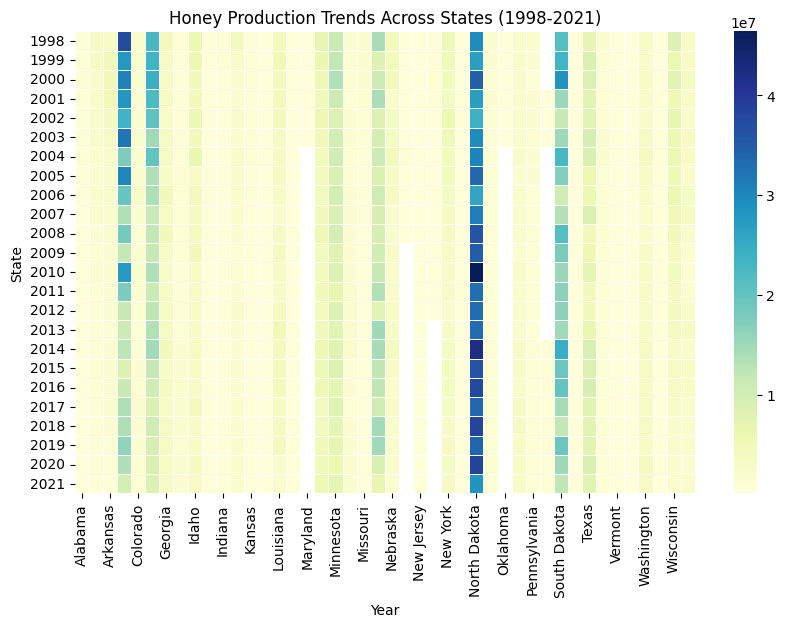

In [15]:
# Calculate total production for each state per year
state_prod_trend = data.groupby(['year', 'State'])['totalprod'].sum().unstack()
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(state_prod_trend, cmap='YlGnBu', linewidths=.5)
plt.title('Honey Production Trends Across States (1998-2021)')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

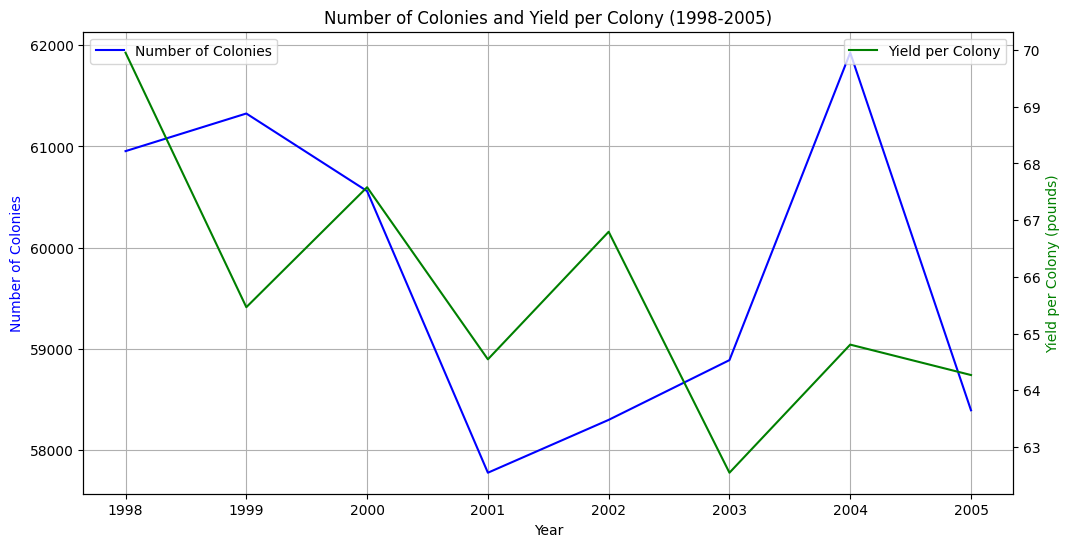

In [16]:
# Filter data before 2006
data_before_2006 = data[data['year'] < 2006]

# Calculate the average number of colonies and yield per colony before 2006
avg_colonies_yield_pre2006 = data_before_2006.groupby('year')[['numcol', 'yieldpercol']].mean().reset_index()

# Plot the trends
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
sns.lineplot(data=avg_colonies_yield_pre2006, x='year', y='numcol', ax=ax1, color='b', label='Number of Colonies')
sns.lineplot(data=avg_colonies_yield_pre2006, x='year', y='yieldpercol', ax=ax2, color='g', label='Yield per Colony')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Colonies', color='b')
ax2.set_ylabel('Yield per Colony (pounds)', color='g')
plt.title('Number of Colonies and Yield per Colony (1998-2005)')
ax1.grid(True)
ax2.grid(False)
plt.show()

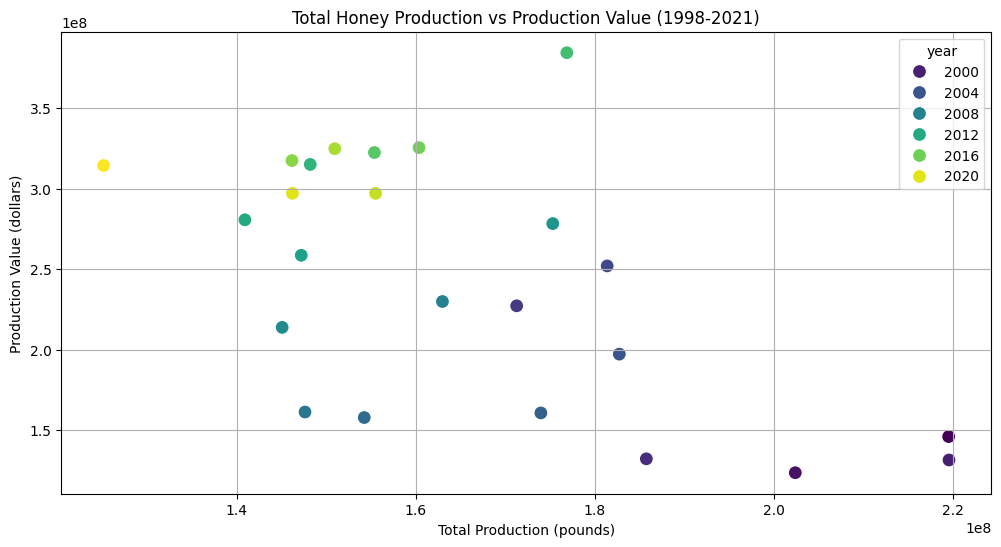

In [17]:
# Calculate total production and production value for each year
total_prod_value_per_year = data.groupby('year')[['totalprod', 'prodvalue']].sum().reset_index()

# Plot total production vs production value
plt.figure(figsize=(12, 6))
sns.scatterplot(data=total_prod_value_per_year, x='totalprod', y='prodvalue', hue='year', palette='viridis', s=100)
plt.title('Total Honey Production vs Production Value (1998-2021)')
plt.xlabel('Total Production (pounds)')
plt.ylabel('Production Value (dollars)')
plt.grid(True)
plt.show()

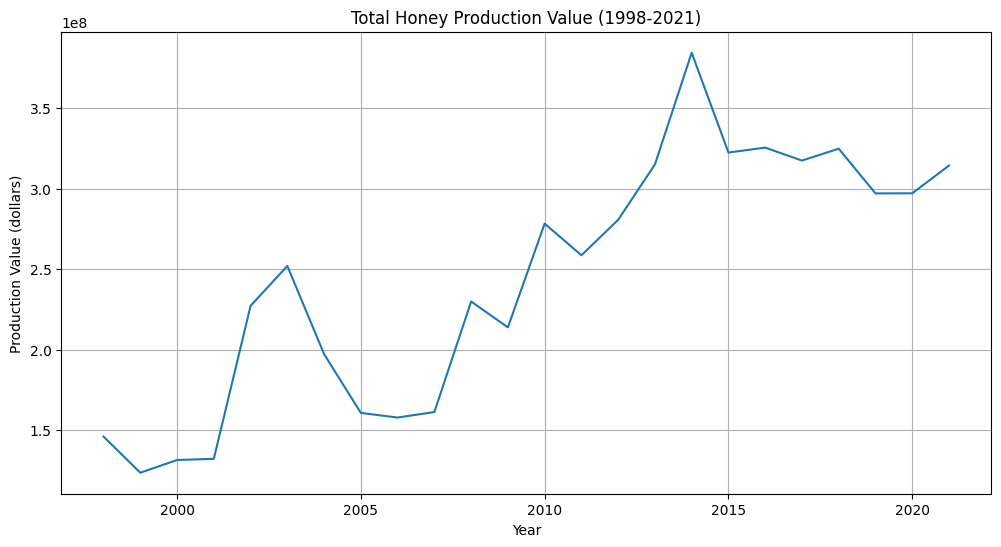

In [18]:
# Plot the production value over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_prod_value_per_year, x='year', y='prodvalue')
plt.title('Total Honey Production Value (1998-2021)')
plt.xlabel('Year')
plt.ylabel('Production Value (dollars)')
plt.grid(True)
plt.show()

### Insights from Visualizations
1.Honey Yield Change (Q1): From the line plot of average honey yield per colony, we can observe the fluctuations over the years. It provides insights into how yield per colony has varied, possibly reflecting environmental or industry changes.

2.Production Trends Across States (Q2): The heatmap shows the states with higher and lower production, indicating regional trends and shifts in production.

3.Pre-2006 Trends (Q3): The dual-axis plot helps us compare the number of colonies and yield per colony before the widespread concern over Colony Collapse Disorder, highlighting any significant changes or stability in the period leading up to 2006.

4.Total Production vs. Value (Q4): The scatter plot allows us to see if there is a direct correlation between the total amount of honey produced and its market value each year.

5.Production Value Trend (Q5): The line plot of production value over the years shows how the market value of honey production has changed, indicating possible changes in demand and pricing strategies.

This approach provides a comprehensive analysis of the honey production trends in the USA from 1998 to 2021.